# Reject Inference 

Find Reasoncodes that are inRejected applied applicaitons and not in approved to find the ones that are only hard rejection codes


# KOLLA IGENOM SEN HUR JAG FILTERRAR N3 för jag får inte samma värden nu som jag fick första gången jag kollade!!!


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder
import os

import pandas as pd
import numpy as np


def getreasonCodes(df): 

    all_codes = []

    code_dict = {}

    for ne in range(1,6,1):

        var = 'reasoncode' + str(ne)
        unique = list(set(df[var]))

        code_dict[var] = unique

        all_codes.append(unique)


    all_all = []

    for l in all_codes:
        for ind in l:
            all_all.append(ind)

    unique = set(all_all)


    return  unique , code_dict


I need python version 3.9.17 in order to run 
import pymssql

In [2]:
from Preprocessing_Application import DataPreprocessor

server = 'reporting-db.nystartfinans.net'
database = 'reporting-db'
username = 'Andreas'
password = 'nCq8Sg@1lYnd(E'


path_MA = "/Users/andreasnilsson/Desktop/PD 2/DATA/Application MA Today.sql"
path_CO = "/Users/andreasnilsson/Desktop/PD 2/DATA/Application CO Today.sql"

preprocessor = DataPreprocessor(server, database, username, password)

main = preprocessor.fetch_data_from_sql(path_MA)
co = preprocessor.fetch_data_from_sql(path_CO)


/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Data-PD-Modelling/Codes/Preprocessing_Application.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, self.conn)


In [3]:

main['Applicationtype'] = 0

co['Applicationtype'] = np.where((co['HasCoapp'] == 1) & (co['CoappSameAddress'] == 1), 2,
                                 np.where((co['HasCoapp'] == 1) & ((co['CoappSameAddress'] == 0) | (co['CoappSameAddress'] == -1)), 1,
                                          1))  ## Will assume missing is same address since its missing in the data and thats the worst case

df = pd.concat([main, co])  


In [4]:
df.SharedVolumeMortgageLoans

0          None
1          None
2          None
3          None
4          None
          ...  
15271      None
15272      None
15273      None
15274    569014
15275      None
Name: SharedVolumeMortgageLoans, Length: 75258, dtype: object

In [5]:
df[df.U_applicationid == '8822878']

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,...,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
13333,8822878,2023-10-23 16:40:19.823,{5DM},AP,ACC,"{""Medsökande har fler än 5 frågor inom 5 dagar.""}",5DM,Medsökande har fler än 5 frågor inom 5 dagar.,None,None,...,26131,N,None,None,1,None,2022-11-01,None,None,1.0


In [6]:
df.Product.value_counts()

Product
Lån mot Lån              63058
Nystartlånet             11361
Förmedlare Skuldsaldo      839
Name: count, dtype: int64

In [7]:
df.Applicationtype.value_counts()

Applicationtype
0    59982
1    12289
2     2987
Name: count, dtype: int64

In [8]:
df.SalesChannel.value_counts()

SalesChannel
BROKER    59125
WEB        9816
Name: count, dtype: int64

In [8]:
#df = df[df.Product =='Lån mot Lån']

df = df[df.Product =='Nystartlånet']    

In [9]:
df.Product.value_counts()

Product
Nystartlånet    11361
Name: count, dtype: int64

In [10]:
df_Broker = df[df.SalesChannel == 'BROKER']
df_Web = df[df.SalesChannel != 'BROKER']

In [11]:
df_Broker.sysdecgrpstd.value_counts()

sysdecgrpstd
AP    285
RF     12
Name: count, dtype: int64

In [12]:
df_Web.sysdecgrpstd.value_counts()

sysdecgrpstd
AP    9507
RF    1557
Name: count, dtype: int64

In [13]:
df.Product.value_counts()

Product
Nystartlånet    11361
Name: count, dtype: int64

In [14]:
AP = df_Broker[df_Broker.sysdecgrpstd == 'AP']
RF =df_Broker[df_Broker.sysdecgrpstd == 'RF']

AP_code_listan, AP_dicten = getreasonCodes(AP)
RF_code_listan, RF_dicten = getreasonCodes(RF)


In [15]:
AP_code_listan

{'1KA',
 '2AS',
 '2KA',
 '2US',
 '5DM',
 '5DS',
 'ADR',
 'BEX',
 'BLS',
 'BWM',
 'BWS',
 'E2S',
 'INK',
 'INM',
 'MSO',
 'None',
 'O30',
 'ONI',
 'ONM',
 'RK3',
 'S30',
 'SSB'}

In [16]:
#Only RF
RF_hard_codes = RF_code_listan - AP_code_listan 

# Only AP
AP_code_listan - RF_code_listan 

# Intersection
RF_code_listan & AP_code_listan 

{'ADR', 'INK', 'INM', 'None'}

## Analyse RF Hard Codes, what do they mean?


### sånna jag vill ifrågasätta

DEL  regel som inte implementerades pga risk men för konverteringsgrad. analysera denna!!!


EEK , ensamsökande, gammalt kalpvärde,  vi kanske inte vill bjuda på den för vi tar betalt för allt vi budar på

EES , ensamsökande, debt ratio > 170 ,  vi kanske inte vill bjuda på den för vi tar betalt för allt vi budar på


nästan som att vi borde implementera den på wewbb också 5FS

In [17]:
RF_hard_codes


{'NYM', 'NYS'}

## RC3 Eller inte av de andra Hårda

In [18]:

# # Your initial filtering using a regex
filtered_RC3 = RF[RF['reasoncodes'].str.contains('|'.join(['RK3', 'RC3']), na=False)]  # ,'DEL'
filtered_RC3


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,...,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum


In [19]:

filtered_RC3_exclude_hard = filtered_RC3.copy()

for code in RF_hard_codes:
    if code in ['RK3', 'RC3']:  # ,'DEL'
        continue
    filtered_RC3_exclude_hard = filtered_RC3_exclude_hard[~filtered_RC3_exclude_hard['reasoncodes'].str.contains(code, na=False)]


In [20]:
BROKER_N3_REJECTS = filtered_RC3_exclude_hard 



In [23]:
pd.set_option('display.max_columns', None) 
BROKER_N3_REJECTS.head(30)

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum


In [24]:
print(len(filtered_RC3_exclude_hard))
len(filtered_RC3_exclude_hard)/len(filtered_RC3)

0


ZeroDivisionError: division by zero

## Broker analysis done

## Start Web analysis

In S1 there is no Hard code for excluding N3, they will just say pending in the system 

Therefor I can exclude all other hardcodes and only look at those that are N3 of system approved


In [25]:
AP = df_Web[df_Web.sysdecgrpstd == 'AP']
RF =df_Web[df_Web.sysdecgrpstd == 'RF']

AP_code_listan, AP_dicten = getreasonCodes(AP)
RF_code_listan, RF_dicten = getreasonCodes(RF)


In [26]:
#Only RF
RF_hard_codes = RF_code_listan - AP_code_listan 

# Only AP
AP_code_listan - RF_code_listan 

# Intersection
RF_code_listan & AP_code_listan 

{'5DM', '5DS', 'ADR', 'BLS', 'IDH', 'INK', 'INM', 'MSO', 'None', 'RK3'}

In [26]:

# # Your initial filtering using a regex
filtered_RC3 = AP[AP['reasoncodes'].str.contains('|'.join(['RK3', 'RC3']), na=False)]  # ,'DEL'
filtered_RC3


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
6,8770365,2023-08-01 01:41:58.923,"{1KA,MSO,RK3}",AP,ACC,"{""Ensamsökande KALP under 5 000 kronor."",""Meds...",1KA,Ensamsökande KALP under 5 000 kronor.,MSO,"Medsökandekrav, ej låneförmedlare.",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,7,8,84,-5818,300000,96,22.65,D,1995,5.41,PDscore_Newcustomer01,1.0,8770365,8770365,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,1,0,5.406944,2023-08-01,None,300000.0,0,Radin,WEB,Nystartlånet,0,None,WEB,2000-09-15,,SINGLE,FULL,RENTED,28000.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,0.0,4.0,NaN,3.0,None,283153.0,NaN,283153.0,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,10,0.159,2022,None,None,485,None,19,None,None,465,2021,None,None,464,None,5,None,None,460,465400.0,459700.0,NaN,19100.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,745,None,1.0,1.0,0.0,0.5844,0.4382,4,2,0,0,0,None,0.87,3.10,0.00,-0.08,0.0,0.81,283153,7,7,316196,None,96957,186196,None,None,7,7,130000,4,3.0,283153,316196,3,0,None,None,4,0,74.58,Ja,None,None,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,8770341,2023-08-01 00:37:06.537,"{BEX,BWS,1KA,MSO,RK3}

In [27]:

filtered_RC3_exclude_hard = filtered_RC3.copy()

for code in RF_hard_codes:
    if code in ['RK3', 'RC3']:  # ,'DEL'
        continue
    filtered_RC3_exclude_hard = filtered_RC3_exclude_hard[~filtered_RC3_exclude_hard['reasoncodes'].str.contains(code, na=False)]


## kommer vara samma för alla hårda policyregler är i RF

In [28]:
WEB_N3_REJECTS =  filtered_RC3_exclude_hard.copy()

In [29]:
WEB_N3_REJECTS

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
6,8770365,2023-08-01 01:41:58.923,"{1KA,MSO,RK3}",AP,ACC,"{""Ensamsökande KALP under 5 000 kronor."",""Meds...",1KA,Ensamsökande KALP under 5 000 kronor.,MSO,"Medsökandekrav, ej låneförmedlare.",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,7,8,84,-5818,300000,96,22.65,D,1995,5.41,PDscore_Newcustomer01,1.0,8770365,8770365,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,1,0,5.406944,2023-08-01,None,300000.0,0,Radin,WEB,Nystartlånet,0,None,WEB,2000-09-15,,SINGLE,FULL,RENTED,28000.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,0.0,4.0,NaN,3.0,None,283153.0,NaN,283153.0,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,10,0.159,2022,None,None,485,None,19,None,None,465,2021,None,None,464,None,5,None,None,460,465400.0,459700.0,NaN,19100.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,745,None,1.0,1.0,0.0,0.5844,0.4382,4,2,0,0,0,None,0.87,3.10,0.00,-0.08,0.0,0.81,283153,7,7,316196,None,96957,186196,None,None,7,7,130000,4,3.0,283153,316196,3,0,None,None,4,0,74.58,Ja,None,None,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,8770341,2023-08-01 00:37:06.537,"{BEX,BWS,1KA,MSO,RK3}

## RANDOMLY PICK 30 % OF ACCOUNTS, OUR WIN RATE ON BROKER IS 25 % BUT SINCE THESE ARE SOMWHAT HIGHER IN RISK WE MAKE A ASSUMPTION THAT THEY WILL BE MORE PROBABLE TO PICK UO A LOAN (+ 5 %)

In [30]:
# Setting a random seed for reproducibility

import random
random.seed(42)

sampled_BROKER_N3_REJECTS = BROKER_N3_REJECTS.sample(frac=0.3)

sampled_BROKER_N3_REJECTS


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
10816,8803101,2023-08-29 11:31:18.407,"{BEX,1AA,1UA,E1S,RC3,RK3}",RF,REJ,"{""Befintlig kund och kanal BROKER."",""Ensamsöka...",BEX,Befintlig kund och kanal BROKER.,1AA,Ensamsökande Nystart skuldkvot över 100 %.,1UA,Ensamsökande UC skuldkvot över 100 %.,E1S,Ensamsökande räntegrupp E och skuldkvot över 7...,RC3,"Riskklass N3, medsökande krävs",7,8,149,-6802,35000,144,23.65,E,995,5.41,PDscore_Newcustomer01,1.0,8803101,8803101,C2EAB8B1E06FEDF29774A49CEBCB375C36BC5DA40E9000...,1,0,5.408990,2023-08-29,None,35000.0,0,None,BROKER,Lån mot Lån,0,Enklare,BROKER,1988-06-20,,DIVORCED,FULL,RENTED,53500.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,0.0,6.0,2.0,6.0,None,956673.0,123732.27,956673.0,C2EAB8B1E06FEDF29774A49CEBCB375C36BC5DA40E9000...,24,0.401,2022,None,None,664,None,108,None,None,556,2021,None,None,504,None,72,None,None,432,556300.0,432000.0,NaN,108000.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,932,None,1.0,1.0,1.0,1.4401,1.0815,6,2,0,5,0,None,0.68,0.37,-0.09,8.81,0.0,0.75,956673,14,11,977146,134408,284527,537738,None,None,14,11,305000,6,6.0,956673,977146,6,0,2,0,6,0,93.29,Nej,None,None,0,0,NaN,NaN

In [31]:
df = pd.concat([WEB_N3_REJECTS,sampled_BROKER_N3_REJECTS])



In [32]:
df 


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
6,8770365,2023-08-01 01:41:58.923,"{1KA,MSO,RK3}",AP,ACC,"{""Ensamsökande KALP under 5 000 kronor."",""Meds...",1KA,Ensamsökande KALP under 5 000 kronor.,MSO,"Medsökandekrav, ej låneförmedlare.",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,7,8,84,-5818,300000,96,22.65,D,1995,5.41,PDscore_Newcustomer01,1.0,8770365,8770365,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,1,0,5.406944,2023-08-01,None,300000.0,0,Radin,WEB,Nystartlånet,0,None,WEB,2000-09-15,,SINGLE,FULL,RENTED,28000.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,0.0,4.0,NaN,3.0,None,283153.0,NaN,283153.0,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,10,0.159,2022,None,None,485,None,19,None,None,465,2021,None,None,464,None,5,None,None,460,465400.0,459700.0,NaN,19100.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,745,None,1.0,1.0,0.0,0.5844,0.4382,4,2,0,0,0,None,0.87,3.10,0.00,-0.08,0.0,0.81,283153,7,7,316196,None,96957,186196,None,None,7,7,130000,4,3.0,283153,316196,3,0,None,None,4,0,74.58,Ja,None,None,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,8770341,2023-08-01 00:37:06.537,"{BEX,BWS,1KA,MSO,RK3}

In [157]:

df = AP[['SSN','UCScore','UtilizationRatio','Amount','MaritalStatus','EmploymentIncome','ReceivedDate','AccountNumber','PaymentRemarks','IndebtednessRatio','ApplicationScore','MortgageLoansHouseVolume','MortgageLoansApartmentVolume','SharedVolumeMortgageLoans','Inquiries12M','BirthDate','Applicationtype','ApplicationID'] ] ##   ApplicationScore 'Inquiries12M',     ---   ,'Applicationtype'   'PropertyVolume',


df = df.copy()

# Convert columns to numeric
df.loc[:, 'MortgageLoansHouseVolume'] = pd.to_numeric(df['MortgageLoansHouseVolume'], errors='coerce')
df.loc[:, 'MortgageLoansApartmentVolume'] = pd.to_numeric(df['MortgageLoansApartmentVolume'], errors='coerce')
df.loc[:, 'SharedVolumeMortgageLoans'] = pd.to_numeric(df['SharedVolumeMortgageLoans'], errors='coerce')

# Replace NaN or None values in the columns with 0
df.loc[:, 'MortgageLoansHouseVolume'] = df['MortgageLoansHouseVolume'].fillna(0)
df.loc[:, 'MortgageLoansApartmentVolume'] = df['MortgageLoansApartmentVolume'].fillna(0)
df.loc[:, 'SharedVolumeMortgageLoans'] = df['SharedVolumeMortgageLoans'].fillna(0)




# Now create the 'PropertyVolume' column
df.loc[:, 'PropertyVolume']  = df['PropertyVolume'] = np.where( (df.MortgageLoansHouseVolume > 0 ) & (df.SharedVolumeMortgageLoans > 0), df.MortgageLoansHouseVolume / 2 ,
                            np.where(df.MortgageLoansHouseVolume > 0  , df.MortgageLoansHouseVolume ,
                                        

                            np.where( ( df.MortgageLoansApartmentVolume > 0 ) & (df.SharedVolumeMortgageLoans > 0 ),    df.MortgageLoansApartmentVolume/ 2 ,
                            np.where( df.MortgageLoansApartmentVolume > 0, df.MortgageLoansApartmentVolume ,         

                                        0))))
                                           


In [158]:
df

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,ApplicationID,PropertyVolume
7,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,0.592,NaN,30000.0,PARTNER,363,2023-08-01,8770334,1,0.0041,7.179085,0.0,0.0,0.0,21,1999-04-15,0,8770334,0
9,401735DBCF8DD25424EDE983242BBFB11C9EAAAA4C569C...,0.560,NaN,30000.0,SINGLE,343,2023-08-01,8770341,1,0.4153,7.881192,0.0,0.0,0.0,2,1991-11-19,0,8770341,0
18,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,0.159,74.58,300000.0,SINGLE,485,2023-08-01,8770365,0,0.5844,5.406944,0.0,0.0,0.0,10,2000-09-15,0,8770365,0
22,3B28572DD2ACEF09B12E55E1F353748D29F6A4977F12B1...,0.690,13.67,200000.0,MARRIED,525,2023-08-01,8770356,1,1.4196,3.376769,1796150.0,0.0,1796150.0,9,1972-08-30,0,8770356,898075.0
31,5FECEEE3903EA6A632287236ED24EF424AB0F6511230EA...,0.723,NaN,30000.0,SINGLE,219,2023-08-01,8770387,1,0.0000,7.881192,0.0,0.0,0.0,5,1998-03-21,0,8770387,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15268,2528E46A9E0979609D6ABC25889535FA8280D819C0E41C...,0.110,62.17,40000.0,None,227,2023-10-31,7976905,0,1.6490,5.406944,0.0,0.0,0.0,13,1974-06-01,1,8871323,0
15270,916179686C9CA3F2B13FD8ABA650687B2BE406114E32BE...,0.325,100.00,150000.0,PARTNER,213,2023-11-10,7978653,0,0.1770,3.880232,0.0,0.0,0.0,38,2002-01-01,2,8882195,0
15272,2DFED7B5137C9BE0D163CA3D51B1DB417AA95B529489F4...,0.002,18.38,300000.0,None,421,2023-11-14,7979347,0,0.1156,1.622251,0.0,0.0,0.0,2,1965-03-20,1,8885352,0
15273,52E39BBB45AF967BE10A74090031C031FE1B27BA1DF6DC...,0.273,97.70,30000.0,MARRIED,279,2023-11-16,7979974,0,0.3091,3.054894,0.0,0.0,0.0,23,1994-08-18,2,8887550,0


In [159]:



# Get today's date without time
today = pd.Timestamp('today').floor('D')

df['BirthDate'] = pd.to_datetime(df['BirthDate'])

# Compute the age based solely on years
df['age'] = today.year -  df['BirthDate'].dt.year

# Adjust for cases where the birthdate hasn't occurred this year yet
df['age'] = np.where((today.month < df['BirthDate'].dt.month) | 
                     ((today.month == df['BirthDate'].dt.month) & (today.day < df['BirthDate'].dt.day)), 
                     df['age']-1, 
                     df['age'])



df['ApplicationScore'] = df['ApplicationScore'] /100


In [160]:

# Sample DataFrame (Assuming you already have this in place)
pd_ = df.copy()
coefficients = np.array([2.03675292e+00 ,-2.18071234e-02  ,3.39715771e-02, -2.12322589e-07])  # Added 4th coefficient
intercept = np.array([-0.13407141])


print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [ 2.03675292e+00 -2.18071234e-02  3.39715771e-02 -2.12322589e-07]
Intercept: [-0.13407141]


In [161]:

columns_to_convert = ['UCScore', 'age', 'Inquiries12M', 'PropertyVolume']

for col in columns_to_convert:
    pd_[col] = pd.to_numeric(pd_[col], errors='coerce')


In [162]:

# Compute the Z values using your logistic regression model
pd_['Z'] = (pd_.UCScore * coefficients[0] +
            pd_.age * coefficients[1] + 
            pd_.Inquiries12M * coefficients[2] +
            pd_.PropertyVolume * coefficients[3] + 
            intercept[0]) 


In [163]:

# Compute the original probabilities
pd_['P'] = pd_['Z'].apply(lambda x: 1 / (1 + np.exp(-x)))




# Coefficients and Intercept from the Calibration model
calibration_coef = 3.7812065422080856
calibration_intercept = -4.336067082588543


print("Coefficient:", calibration_coef)
print("Intercept:", calibration_intercept)

# Using the original probabilities to calibrate them with the calibration model
pd_['Z_calibrated'] = pd_['P'].apply(lambda x: x * calibration_coef + calibration_intercept)

# Compute the calibrated probabilities
pd_['P_calibrated'] = pd_['Z_calibrated'].apply(lambda x: 1 / (1 + np.exp(-x)))



# Binning structure
binsV = [0, 0.038, 0.0535, 0.0685, 0.093, 0.133, 1]

pd_['Probability_Bins'] = pd.cut(pd_['P_calibrated'], bins=binsV, labels=False)



Coefficient: 3.7812065422080856
Intercept: -4.336067082588543


In [164]:
# Step 1: Convert the 'ReceivedDate' column to datetime type
pd_['ReceivedDate'] = pd.to_datetime(pd_['ReceivedDate'], errors='coerce')

# Step 2: Use the .dt accessor
pd_['YearMonth'] = pd_['ReceivedDate'].dt.to_period('M')



In [165]:
#pd_ = pd_[pd_.ApplicationScore < 0.05]

pd_.Applicationtype.value_counts()


Applicationtype
0    6192
1    2534
2     781
Name: count, dtype: int64

In [173]:
Descriptive = pd.DataFrame(['Approved'])

Descriptive['Data'] = 'Approved'
Descriptive['UCScore'] = np.mean(pd_.UCScore)
Descriptive['New Model'] = np.mean(pd_.P_calibrated)
Descriptive['Current Model'] = np.mean(pd_.ApplicationScore)

In [174]:
Descriptive

,0,Data,UCScore,New Model,Current Model
0,Approved,Approved,0.290891,0.107326,0.036627


In [175]:
np.mean(pd_.UCScore)

0.29089135661133375

In [176]:
np.mean(pd_.P_calibrated)

0.10732564966634288

In [177]:
np.mean(pd_.ApplicationScore)

0.03662726694847667

In [178]:
pd_[pd_.ApplicationID == '8770417']

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,ApplicationID,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
42,CE4DA76FAA6F4CBB1F3AD71945EAC35D5C10B9B6363204...,0.353,93.89,200000.0,PARTNER,421,2023-08-01,7943673,0,1.1046,0.022825,0.0,0.0,0.0,19.0,1978-09-11,0,8770417,0.0,45,0.249042,0.561941,-2.211253,0.098744,4.0,2023-08


In [179]:
file_path = "/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Data-PD-Modelling/Codes/Application id Alkompis.xlsx"
df = pd.read_excel(file_path)

In [180]:
df['Application id'] =  df['Application id'].astype(str)

In [181]:
df[df['Application id'] == '8872805']

,Application id
3,8872805


In [185]:
allKompis = pd_[pd_.ApplicationID.isin(df['Application id'])]
allKompis

len(allKompis[allKompis.P_calibrated < 0.093])/172

0.3372093023255814

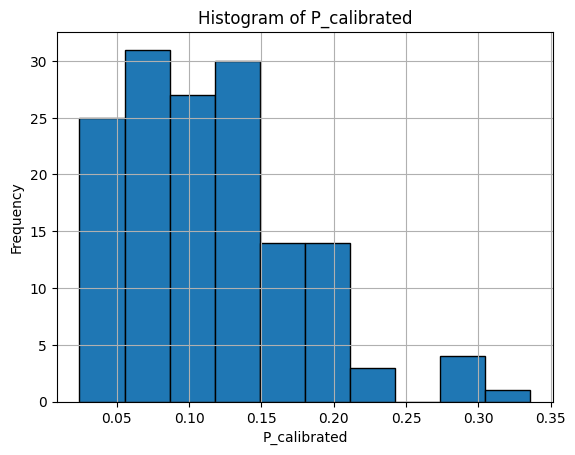

In [183]:
import matplotlib.pyplot as plt

# Choose the feature (column) for which you want to create a histogram
feature_name = 'P_calibrated'

# Create a histogram
plt.hist(allKompis[feature_name], bins=10, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_name}')
plt.grid(True)

In [141]:
Descriptive1 = pd.DataFrame(['allKompis'])

Descriptive1['Data'] = 'Approved'
Descriptive1['UCScore'] = np.mean(allKompis.UCScore)
Descriptive1['New Model'] = np.mean(allKompis.P_calibrated)
Descriptive1['Current Model'] = np.mean(allKompis.ApplicationScore)

In [142]:
Descriptive1

,0,Data,UCScore,New Model,Current Model
0,allKompis,Approved,0.372916,0.115193,0.042193


In [105]:
pd_[pd_.ApplicationID == '8883298']

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,ApplicationID,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth


In [106]:
pd_.ApplicationID

22       8770356
42       8770417
44       8770396
67       8770483
74       8770481
          ...   
15264    8861003
15267    8867538
15270    8882195
15272    8885352
15273    8887550
Name: ApplicationID, Length: 6864, dtype: object

Applicationtype
0    2322
1     285
2      36
Name: count, dtype: int64

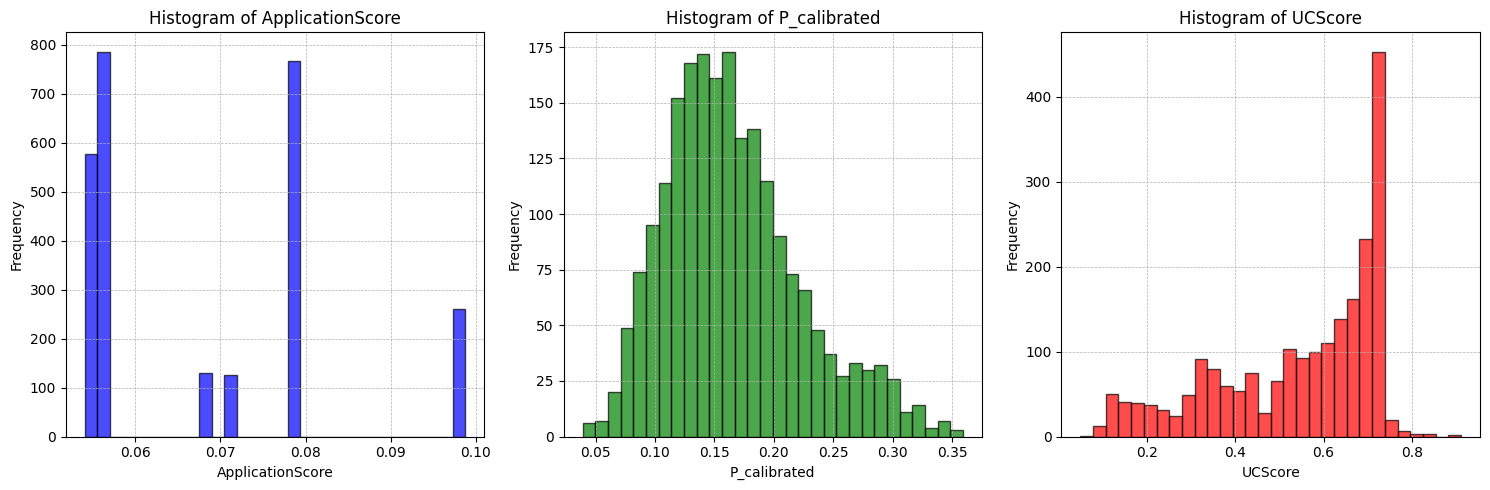

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plotFeatureHist(df, feature1, feature2, feature3):
    # Create a figure and axis
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    # Plot histograms for feature1
    axs[0].hist(df[feature1], bins=30, edgecolor='k', alpha=0.7, color='blue', density=False)
    axs[0].set_title(f'Histogram of {feature1}')
    axs[0].set_xlabel(f'{feature1}')
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for feature2
    axs[1].hist(df[feature2], bins=30, edgecolor='k', alpha=0.7, color='green', density=False)
    axs[1].set_title(f'Histogram of {feature2}')
    axs[1].set_xlabel(f'{feature2}')
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for feature3
    axs[2].hist(df[feature3], bins=30, edgecolor='k', alpha=0.7, color='red', density=False)
    axs[2].set_title(f'Histogram of {feature3}')
    axs[2].set_xlabel(f'{feature3}')
    axs[2].set_ylabel('Frequency')
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage (assuming you have a DataFrame 'df' with these features)
plotFeatureHist(pd_, 'ApplicationScore', 'P_calibrated', 'UCScore')


In [59]:
df

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
6,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,0.159,74.58,300000.0,SINGLE,485,2023-08-01,8770365,0,0.5844,0.054069,0.0,0.0,0.0,10.0,2000-09-15,0,0.0,23,0.027924,0.506981,-2.419069,0.081730,3.0,2023-08
10,401735DBCF8DD25424EDE983242BBFB11C9EAAAA4C569C...,0.560,NaN,30000.0,SINGLE,343,2023-08-01,8770341,1,0.4153,0.078812,0.0,0.0,0.0,2.0,1991-11-19,0,0.0,31,0.398433,0.598311,-2.073730,0.111677,4.0,2023-08
31,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,0.592,NaN,30000.0,PARTNER,363,2023-08-01,8770334,1,0.0041,0.071791,0.0,0.0,0.0,21.0,1999-04-15,0,0.0,24,1.261718,0.779322,-1.389290,0.199521,5.0,2023-08
68,25660A5A420525A0250D29960E17FAEAEBE2A71E6095EE...,0.439,NaN,30000.0,SINGLE,245,2023-08-01,8770530,1,NaN,0.054090,0.0,0.0,0.0,2.0,1994-02-01,0,0.0,29,0.195600,0.548745,-2.261150,0.094392,4.0,2023-08
170,5FECEEE3903EA6A632287236ED24EF424AB0F6511230EA...,0.723,NaN,30000.0,SINGLE,219,2023-08-01,8770387,1,0.0000,0.078812,0.0,0.0,0.0,5.0,1998-03-21,0,0.0,25,0.963181,0.723758,-1.599388,0.168067,5.0,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,528C8EEB7A7C18319028F3DF4429E71D8271956B3E3780...,0.349,99.09,135000.0,SINGLE,372,2023-08-28,8800630,0,0.8303,0.054090,0.0,0.0,0.0,14.0,1997-03-16,0,0.0,26,0.485372,0.619016,-1.995441,0.119682,4.0,2023-08
24624,None,NaN,NaN,45000.0,SINGLE,None,2023-08-14,8785128,0,NaN,0.098740,0.0,0.0,0.0,NaN,2001-08-22,0,0.0,22,NaN,NaN,NaN,NaN,NaN,2023-08
26685,51EA932D24C88E6BD2C185E7E0EC58173C54548A858FC2...,0.734,99.65,65000.0,SINGLE,410,2023-10-13,8853479,0,0.5264,0.078812,0.0,0.0,0.0,15.0,1997-08-03,0,0.0,26,1.303494,0.786422,-1.362442,0.203844,5.0,2023-10
47664,4C4DED4233C277EA2B760C75CEECE98F2BD2875C146AA2...,0.109,100.00,150000.0,SINGLE,285,2023-10-31,8870692,0,0.6426,0.054069,0.0,0.0,0.0,10.0,2002-11-19,0,0.0,20,-0.008492,0.497877,-2.453491,0.079184,3.0,2023-10


In [61]:
df.groupby('Probability_Bins')['Amount'].count().reset_index()

,Probability_Bins,Amount
0,1.0,6
1,2.0,24
2,3.0,218
3,4.0,645
4,5.0,1531


In [62]:
df.groupby('Probability_Bins')['ApplicationScore'].mean().reset_index()

,Probability_Bins,ApplicationScore
0,1.0,0.054069
1,2.0,0.055106
2,3.0,0.055135
3,4.0,0.060669
4,5.0,0.068794


In [42]:
# Assuming df is a derived DataFrame
df = df.copy()

# Starting with a base score for all rows
df.loc[:, 'score'] = -4.2059

# Adjust score based on UCScore
df.loc[df['UCScore'] < 10, 'score'] += 0
df.loc[(df['UCScore'] >= 10) & (df['UCScore'] < 30), 'score'] += 0.9958
df.loc[(df['UCScore'] >= 30) & (df['UCScore'] < 50), 'score'] += 1.2435
df.loc[df['UCScore'] >= 50, 'score'] += 1.6464

# Adjust score based on MaritalStatus
df.loc[~df['MaritalStatus'].isin(['PARTNER','MARRIED']), 'score'] += 0.3482

# Adjust score based on Age
df.loc[df['age'] < 25, 'score'] += 0
df.loc[(df['age'] >= 25) & (df['age'] < 39), 'score'] += -0.2473
df.loc[df['age'] >= 39, 'score'] += -0.7944

df['old_model'] = (np.exp(df['score']) / (1 + np.exp(df['score']))) * 100  #) /10


In [43]:
pd_[pd_.Probability_Bins == 2 ]

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
692,AF6A50C0E0EB8FF246F0018E2212B477839C4A6E74BFB6...,0.111,0.00,100000.0,SINGLE,308,2023-08-02,8773167,1,0.0000,0.054069,0.0,0.0,0.0,4.0,2000-04-10,0,0.0,23,-0.273669,0.432006,-2.702561,0.062822,2.0,2023-08
2142,35E6837B1DA855871255DAB243212C2017A35A14AFCD92...,0.156,NaN,30000.0,SINGLE,218,2023-08-05,8775982,1,NaN,0.054069,0.0,0.0,0.0,1.0,1998-12-05,0,0.0,24,-0.305737,0.424156,-2.732247,0.061097,2.0,2023-08
14135,27CBCAA615410B7742256049B08660185E54722F6ACF44...,0.336,NaN,100000.0,SINGLE,132,2023-09-04,8811555,1,NaN,0.054090,0.0,0.0,0.0,3.0,1985-07-20,0,0.0,38,-0.176478,0.455995,-2.611857,0.068379,2.0,2023-09
49512,C2CBAF28F0B69F32814A585012C317A934A0025A2F7D1C...,0.118,100.00,200000.0,SINGLE,297,2023-11-06,8877647,0,0.7415,0.054069,0.0,0.0,0.0,7.0,1999-03-04,0,0.0,24,-0.179304,0.455294,-2.614508,0.068211,2.0,2023-11
1337,0B8277766EC8DC37AA37FA405EE04A5179CE1776744F0F...,0.300,94.03,150000.0,None,479,2023-01-31,8556213,0,1.4491,0.054090,0.0,0.0,0.0,15.0,1964-01-24,1,0.0,59,-0.300092,0.425535,-2.727032,0.061397,2.0,2023-01
2013,AE7B6857111D4805D35EDA6E6492254F3FBC02D588BFC8...,0.517,18.05,100000.0,None,518,2023-02-27,8587791,1,0.6233,0.078812,182003.0,0.0,62603.0,5.0,1960-06-06,1,91001.5,63,-0.304383,0.424486,-2.730996,0.061169,2.0,2023-02
2553,1023D6F00EC5C34FAB77DBD353656186F88AD96156C495...,0.211,100.00,450000.0,SINGLE,127,2023-04-03,8628984,0,0.2521,0.054069,0.0,0.0,0.0,26.0,1959-01-25,1,0.0,64,-0.216711,0.446033,-2.649523,0.066018,2.0,2023-04
6382,2A967503C6274184FC420E53CC81B4701EDA57DBAF00A4...,0.131,NaN,400000.0,None,101,2023-02-13,8572342,0,0.1115,0.054069,0.0,0.0,0.0,5.0,2001-06-07,1,0.0,22,-0.177156,0.455827,-2.612493,0.068339,2.0,2023-02
6566,D966FD1A30DED99CFB32CC2F773D5A281DC2EC83114D74...,0.167,91.51,30000.0,None,345,2023-06-16,8718169,0,1.0771,0.054069,0.0,0.0,0.0,9.0,1983-02-15,1,0.0,40,-0.360474,0.410845,-2.782578,0.058273,2.0,2023-06
6864,F01CA2A334FAEC3D556C7EEEAA895B84F9E3EF063C2921...,0.096,NaN,30000.0,SINGLE,None,2023-06-03,8702924,0,NaN,0.054069,0.0,0.0,0.0,5.0,2001-08-30,1,0.0,22,-0.248442,0.438207,-2.679116,0.064217,2.0,2023-06


In [44]:
pd_[pd_.AccountNumber ==  '8718169']

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
6566,D966FD1A30DED99CFB32CC2F773D5A281DC2EC83114D74...,0.167,91.51,30000.0,None,345,2023-06-16,8718169,0,1.0771,0.054069,0.0,0.0,0.0,9.0,1983-02-15,1,0.0,40,-0.360474,0.410845,-2.782578,0.058273,2.0,2023-06


In [45]:
pd_.Applicationtype.value_counts()

Applicationtype
0    2406
1     221
2      33
Name: count, dtype: int64

In [46]:
pd_

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
6,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,0.159,74.58,300000.0,SINGLE,485,2023-08-01,8770365,0,0.5844,0.054069,0.0,0.0,0.0,10.0,2000-09-15,0,0.0,23,0.027924,0.506981,-2.419069,0.081730,3.0,2023-08
10,401735DBCF8DD25424EDE983242BBFB11C9EAAAA4C569C...,0.560,NaN,30000.0,SINGLE,343,2023-08-01,8770341,1,0.4153,0.078812,0.0,0.0,0.0,2.0,1991-11-19,0,0.0,31,0.398433,0.598311,-2.073730,0.111677,4.0,2023-08
31,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,0.592,NaN,30000.0,PARTNER,363,2023-08-01,8770334,1,0.0041,0.071791,0.0,0.0,0.0,21.0,1999-04-15,0,0.0,24,1.261718,0.779322,-1.389290,0.199521,5.0,2023-08
68,25660A5A420525A0250D29960E17FAEAEBE2A71E6095EE...,0.439,NaN,30000.0,SINGLE,245,2023-08-01,8770530,1,NaN,0.054090,0.0,0.0,0.0,2.0,1994-02-01,0,0.0,29,0.195600,0.548745,-2.261150,0.094392,4.0,2023-08
170,5FECEEE3903EA6A632287236ED24EF424AB0F6511230EA...,0.723,NaN,30000.0,SINGLE,219,2023-08-01,8770387,1,0.0000,0.078812,0.0,0.0,0.0,5.0,1998-03-21,0,0.0,25,0.963181,0.723758,-1.599388,0.168067,5.0,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,528C8EEB7A7C18319028F3DF4429E71D8271956B3E3780...,0.349,99.09,135000.0,SINGLE,372,2023-08-28,8800630,0,0.8303,0.054090,0.0,0.0,0.0,14.0,1997-03-16,0,0.0,26,0.485372,0.619016,-1.995441,0.119682,4.0,2023-08
24624,None,NaN,NaN,45000.0,SINGLE,None,2023-08-14,8785128,0,NaN,0.098740,0.0,0.0,0.0,NaN,2001-08-22,0,0.0,22,NaN,NaN,NaN,NaN,NaN,2023-08
26685,51EA932D24C88E6BD2C185E7E0EC58173C54548A858FC2...,0.734,99.65,65000.0,SINGLE,410,2023-10-13,8853479,0,0.5264,0.078812,0.0,0.0,0.0,15.0,1997-08-03,0,0.0,26,1.303494,0.786422,-1.362442,0.203844,5.0,2023-10
47664,4C4DED4233C277EA2B760C75CEECE98F2BD2875C146AA2...,0.109,100.00,150000.0,SINGLE,285,2023-10-31,8870692,0,0.6426,0.054069,0.0,0.0,0.0,10.0,2002-11-19,0,0.0,20,-0.008492,0.497877,-2.453491,0.079184,3.0,2023-10


In [47]:
print(min(pd_.ReceivedDate))
print(max(pd_.ReceivedDate))

2022-08-16 00:00:00
2023-11-15 00:00:00


In [48]:

def getstats(df):    
    stats = {}
    
    stats["SumAmount < 220000"] = np.sum(df[df.Amount < 220000].Amount)
    #stats["StartupFeeSum < 220000"] = sum(df[df.Amount < 220000].StartupFee)
    
    stats["Count < 220000"] = len(df[df.Amount < 220000].Amount)
    
    #stats["StartupFeeSum > 220000"] = sum(df[df.Amount > 220000].StartupFee)

    stats["SumAmount > 220000"] = np.sum(df[df.Amount > 220000].Amount)
    stats["Count > 220000"] = len(df[df.Amount > 220000].Amount)

    # Calculate proportion of "Ever90" values that are 1 for Amount < 220000
    #stats["Ever90 proportion < 220000"] = len(df[(df.Ever90 == 1) & (df.Amount < 220000)]) / len(df[df.Amount < 220000])

    # Calculate proportion of "Ever90" values that are 1 for Amount > 220000
    #stats["Ever90 proportion > 220000"] = len(df[(df.Ever90 == 1) & (df.Amount > 220000)]) / len(df[df.Amount > 220000])

    return pd.Series(stats)



df = pd.DataFrame(pd_)
df['Applicationtype']   = np.where(df['Applicationtype'] == 0 , 0 ,1)


# Groupby and apply
result = df.groupby(['Probability_Bins', 'Applicationtype']).apply(getstats)

# Rename Applicationtype for clarity
#result.index.set_levels(['Main' if i == 0 else 'Co' for i in result.index.get_level_values(1)], level=1, inplace=True) 


result


SumAmount < 220000  Count < 220000  \
Probability_Bins Applicationtype                                       
1.0              1                          340000.0             5.0   
2.0              0                         1040000.0             9.0   
                 1                          631000.0             7.0   
3.0              0                        15457000.0           152.0   
                 1                         2856000.0            23.0   
4.0              0                        54517895.0           499.0   
                 1                         4713000.0            44.0   
5.0              0                       139839700.0          1299.0   
                 1                         5902000.0            64.0   

                                  SumAmount > 220000  Count > 220000  
Probability_Bins Applicationtype                                      
1.0              1                          300000.0             1.0  
2.0              0                         1960000.0             5.0  
                 1                         1100000.0             3.0  
3.0              0                        10385000.0            31.0  
                 1                         3131000.0            10.0  
4.0              0                        24458324.0            72.0  
                 1                         9291000.0            27.0  
5.0              0                        40082000.0           116.0  
                 1                        17199000.0            50.0

In [49]:
file_name = "Distribution.xlsx"
result.to_excel(file_name, engine='openpyxl', index=False)

In [50]:
df[df.ReceivedDate >='2023-08-01']

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
6,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,0.159,74.58,300000.0,SINGLE,485,2023-08-01,8770365,0,0.5844,0.054069,0.0,0.0,0.0,10.0,2000-09-15,0,0.0,23,0.027924,0.506981,-2.419069,0.081730,3.0,2023-08
10,401735DBCF8DD25424EDE983242BBFB11C9EAAAA4C569C...,0.560,NaN,30000.0,SINGLE,343,2023-08-01,8770341,1,0.4153,0.078812,0.0,0.0,0.0,2.0,1991-11-19,0,0.0,31,0.398433,0.598311,-2.073730,0.111677,4.0,2023-08
31,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,0.592,NaN,30000.0,PARTNER,363,2023-08-01,8770334,1,0.0041,0.071791,0.0,0.0,0.0,21.0,1999-04-15,0,0.0,24,1.261718,0.779322,-1.389290,0.199521,5.0,2023-08
68,25660A5A420525A0250D29960E17FAEAEBE2A71E6095EE...,0.439,NaN,30000.0,SINGLE,245,2023-08-01,8770530,1,NaN,0.054090,0.0,0.0,0.0,2.0,1994-02-01,0,0.0,29,0.195600,0.548745,-2.261150,0.094392,4.0,2023-08
170,5FECEEE3903EA6A632287236ED24EF424AB0F6511230EA...,0.723,NaN,30000.0,SINGLE,219,2023-08-01,8770387,1,0.0000,0.078812,0.0,0.0,0.0,5.0,1998-03-21,0,0.0,25,0.963181,0.723758,-1.599388,0.168067,5.0,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,528C8EEB7A7C18319028F3DF4429E71D8271956B3E3780...,0.349,99.09,135000.0,SINGLE,372,2023-08-28,8800630,0,0.8303,0.054090,0.0,0.0,0.0,14.0,1997-03-16,0,0.0,26,0.485372,0.619016,-1.995441,0.119682,4.0,2023-08
24624,None,NaN,NaN,45000.0,SINGLE,None,2023-08-14,8785128,0,NaN,0.098740,0.0,0.0,0.0,NaN,2001-08-22,0,0.0,22,NaN,NaN,NaN,NaN,NaN,2023-08
26685,51EA932D24C88E6BD2C185E7E0EC58173C54548A858FC2...,0.734,99.65,65000.0,SINGLE,410,2023-10-13,8853479,0,0.5264,0.078812,0.0,0.0,0.0,15.0,1997-08-03,0,0.0,26,1.303494,0.786422,-1.362442,0.203844,5.0,2023-10
47664,4C4DED4233C277EA2B760C75CEECE98F2BD2875C146AA2...,0.109,100.00,150000.0,SINGLE,285,2023-10-31,8870692,0,0.6426,0.054069,0.0,0.0,0.0,10.0,2002-11-19,0,0.0,20,-0.008492,0.497877,-2.453491,0.079184,3.0,2023-10


In [51]:

df


result = df.groupby('Probability_Bins')['Amount'].count().reset_index()

result['Count'] = result['Amount']

In [52]:
amount = df.groupby('Probability_Bins')['Amount'].sum().reset_index()
result['Amount'] = amount.Amount
result

,Probability_Bins,Amount,Count
0,1.0,640000.0,6
1,2.0,4731000.0,24
2,3.0,32269000.0,218
3,4.0,93640219.0,645
4,5.0,203462700.0,1531


In [53]:
file_name = "Distribution.xlsx"
result.to_excel(file_name, engine='openpyxl', index=False)


In [54]:
RF.BrokerName

15       None
43       None
123      None
168      None
185      None
         ... 
14625    None
14627    None
14647    None
14649    None
14710    None
Name: BrokerName, Length: 1331, dtype: object

In [55]:
RF[RF.U_applicationid == '8787680'].BrokerName

Series([], Name: BrokerName, dtype: object)

In [56]:

AP[AP['reasoncodes'].str.contains('INK', na=False)]


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
145,8771138,2023-08-01 13:28:37.897,"{INK,1AA,1UA,1KA,MSO,E1S}",AP,ACC,"{""Sökandes uppgivna inkomst mer än 120 % av UC...",INK,Sökandes uppgivna inkomst mer än 120 % av UC i...,1AA,Ensamsökande Nystart skuldkvot över 100 %.,1UA,Ensamsökande UC skuldkvot över 100 %.,1KA,Ensamsökande KALP under 5 000 kronor.,MSO,"Medsökandekrav, ej låneförmedlare.",7,8,152,-3235,200000,96,22.65,E,1995,4.92,PDscore_Newcustomer01,1.0,8771138,8771138,E01F5935F58584716FCD05E996014EDBF1E0F12F45BB0A...,1,0,7.179085,2023-08-01,None,200000.0,0,Michael,WEB,Nystartlånet,0,None,WEB,1999-09-20,,PARTNER,FULL,OWNED,32000.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,NaN,NaN,NaN,NaN,None,NaN,NaN,0.0,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

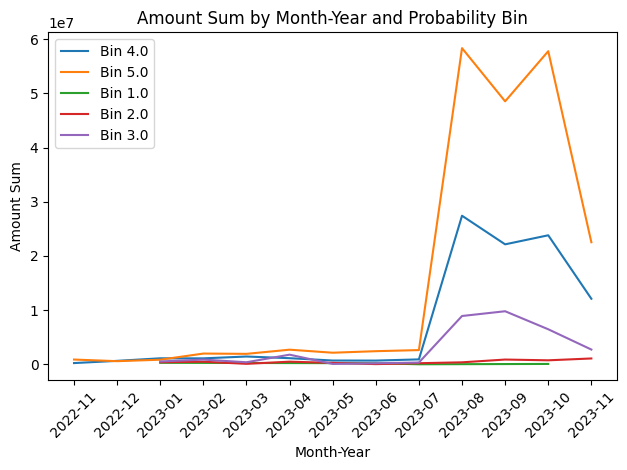

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data setup
# df = pd.DataFrame(pd_)

# Extract year and month from 'ReceivedDate'
df['YearMonth'] = df['ReceivedDate'].dt.to_period('M')

# Group by 'YearMonth' and 'Probability_Bins', then sum 'Amount'
result = df.groupby(['YearMonth', 'Probability_Bins'])['Amount'].sum().reset_index()

# Plotting
for bin in result['Probability_Bins'].unique():
    subset = result[result['Probability_Bins'] == bin]
    plt.plot(subset['YearMonth'].astype(str), subset['Amount'], label=f"Bin {bin}")

plt.title("Amount Sum by Month-Year and Probability Bin")
plt.xlabel("Month-Year")
plt.ylabel("Amount Sum")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust plot layout for better visibility
plt.show()


In [58]:
pd_

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,SharedVolumeMortgageLoans,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
6,C62F1867725F2DFEE41E523B50C0142D88A6D4B2DC73CE...,0.159,74.58,300000.0,SINGLE,485,2023-08-01,8770365,0,0.5844,0.054069,0.0,0.0,0.0,10.0,2000-09-15,0,0.0,23,0.027924,0.506981,-2.419069,0.081730,3.0,2023-08
10,401735DBCF8DD25424EDE983242BBFB11C9EAAAA4C569C...,0.560,NaN,30000.0,SINGLE,343,2023-08-01,8770341,1,0.4153,0.078812,0.0,0.0,0.0,2.0,1991-11-19,0,0.0,31,0.398433,0.598311,-2.073730,0.111677,4.0,2023-08
31,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,0.592,NaN,30000.0,PARTNER,363,2023-08-01,8770334,1,0.0041,0.071791,0.0,0.0,0.0,21.0,1999-04-15,0,0.0,24,1.261718,0.779322,-1.389290,0.199521,5.0,2023-08
68,25660A5A420525A0250D29960E17FAEAEBE2A71E6095EE...,0.439,NaN,30000.0,SINGLE,245,2023-08-01,8770530,1,NaN,0.054090,0.0,0.0,0.0,2.0,1994-02-01,0,0.0,29,0.195600,0.548745,-2.261150,0.094392,4.0,2023-08
170,5FECEEE3903EA6A632287236ED24EF424AB0F6511230EA...,0.723,NaN,30000.0,SINGLE,219,2023-08-01,8770387,1,0.0000,0.078812,0.0,0.0,0.0,5.0,1998-03-21,0,0.0,25,0.963181,0.723758,-1.599388,0.168067,5.0,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,528C8EEB7A7C18319028F3DF4429E71D8271956B3E3780...,0.349,99.09,135000.0,SINGLE,372,2023-08-28,8800630,0,0.8303,0.054090,0.0,0.0,0.0,14.0,1997-03-16,0,0.0,26,0.485372,0.619016,-1.995441,0.119682,4.0,2023-08
24624,None,NaN,NaN,45000.0,SINGLE,None,2023-08-14,8785128,0,NaN,0.098740,0.0,0.0,0.0,NaN,2001-08-22,0,0.0,22,NaN,NaN,NaN,NaN,NaN,2023-08
26685,51EA932D24C88E6BD2C185E7E0EC58173C54548A858FC2...,0.734,99.65,65000.0,SINGLE,410,2023-10-13,8853479,0,0.5264,0.078812,0.0,0.0,0.0,15.0,1997-08-03,0,0.0,26,1.303494,0.786422,-1.362442,0.203844,5.0,2023-10
47664,4C4DED4233C277EA2B760C75CEECE98F2BD2875C146AA2...,0.109,100.00,150000.0,SINGLE,285,2023-10-31,8870692,0,0.6426,0.054069,0.0,0.0,0.0,10.0,2002-11-19,0,0.0,20,-0.008492,0.497877,-2.453491,0.079184,3.0,2023-10
